In [1]:
import pandas as pd

# Load the CSV and Excel files to understand their structure and content
solar_data = pd.read_csv('../DATA2/solar.csv')
sunrise_sunset_data = pd.read_excel('../DATA2/sunrise-sunset.xlsx')
weather_data = pd.read_csv('../DATA2/weather.csv')

# Displaying the first few rows of each dataset to understand their structure
solar_data_head = solar_data.head()
sunrise_sunset_data_head = sunrise_sunset_data.head()
weather_data_head = weather_data.head()

solar_data_head, sunrise_sunset_data_head, weather_data_head

(                       timestamp   kwh
 0  2023-03-11 16:00:10.160454+01  0.54
 1  2023-03-11 17:00:10.217795+01  1.02
 2  2023-03-11 18:00:10.284064+01  1.17
 3  2023-03-11 19:00:10.224836+01  1.18
 4  2023-03-11 20:00:10.201847+01  1.18,
        datum   Opkomst Op ware middag Ondergang
 0 2023-01-01  08:45:00       12:46:00  16:47:00
 1 2023-01-02  08:45:00       12:46:00  16:48:00
 2 2023-01-03  08:45:00       12:47:00  16:49:00
 3 2023-01-04  08:44:00       12:47:00  16:51:00
 4 2023-01-05  08:44:00       12:48:00  16:52:00,
                                       FID                    the_geom  code  \
 0  synop_data.6418.2023-03-01 09:00:00+00  POINT (51.347375 3.201846)  6418   
 1  synop_data.6414.2023-03-01 09:00:00+00   POINT (50.90398 3.121692)  6414   
 2  synop_data.6407.2023-03-01 09:00:00+00  POINT (51.200341 2.887306)  6407   
 3  synop_data.6434.2023-03-01 09:00:00+00  POINT (50.980293 3.816003)  6434   
 4  synop_data.6434.2023-03-01 10:00:00+00  POINT (50.980293 3.8

In [2]:

# Check for missing values and review summary statistics for each dataset
missing_solar = solar_data.isnull().sum()
stats_solar = solar_data.describe()

missing_sunrise_sunset = sunrise_sunset_data.isnull().sum()
stats_sunrise_sunset = sunrise_sunset_data.describe()

missing_weather = weather_data.isnull().sum()
stats_weather = weather_data.describe()

missing_solar, stats_solar, missing_sunrise_sunset, stats_sunrise_sunset, missing_weather, stats_weather


(timestamp    0
 kwh          0
 dtype: int64,
                kwh
 count  9705.000000
 mean   1401.190049
 std     741.801205
 min       0.000000
 25%     772.572600
 50%    1737.388200
 75%    1964.015800
 max    2417.478800,
 datum             0
 Opkomst           0
 Op ware middag    0
 Ondergang         0
 dtype: int64,
                      datum
 count                  731
 mean   2024-01-01 00:00:00
 min    2023-01-01 00:00:00
 25%    2023-07-02 12:00:00
 50%    2024-01-01 00:00:00
 75%    2024-07-01 12:00:00
 max    2024-12-31 00:00:00,
 FID                                0
 the_geom                           0
 code                               0
 timestamp                          0
 precip_quantity                33549
 precip_range                   33423
 temp                               0
 temp_min                       38180
 temp_max                       38183
 temp_grass_min                 38651
 wind_speed                        13
 wind_speed_unit              

C:\Users\tomde\AppData\Local\Temp\ipykernel_8796\3401057051.py:5: FutureWarning: In a future version of pandas, parsing datetimes with mixed time zones will raise an error unless `utc=True`. Please specify `utc=True` to opt in to the new behaviour and silence this warning. To create a `Series` with mixed offsets and `object` dtype, please use `apply` and `datetime.datetime.strptime`
  plt.plot(pd.to_datetime(solar_data['timestamp']), solar_data['kwh'])


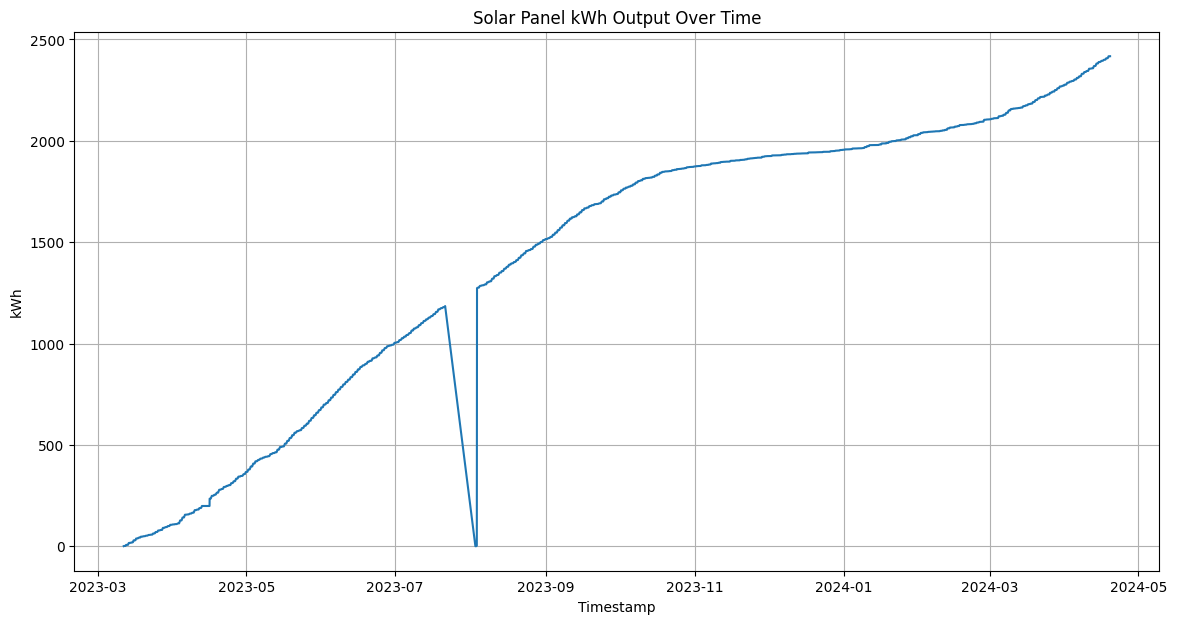

In [3]:
import matplotlib.pyplot as plt

# Plotting the kWh output to inspect for any obvious outliers or unusual patterns
plt.figure(figsize=(14, 7))
plt.plot(pd.to_datetime(solar_data['timestamp']), solar_data['kwh'])
plt.title('Solar Panel kWh Output Over Time')
plt.xlabel('Timestamp')
plt.ylabel('kWh')
plt.grid(True)
plt.show()


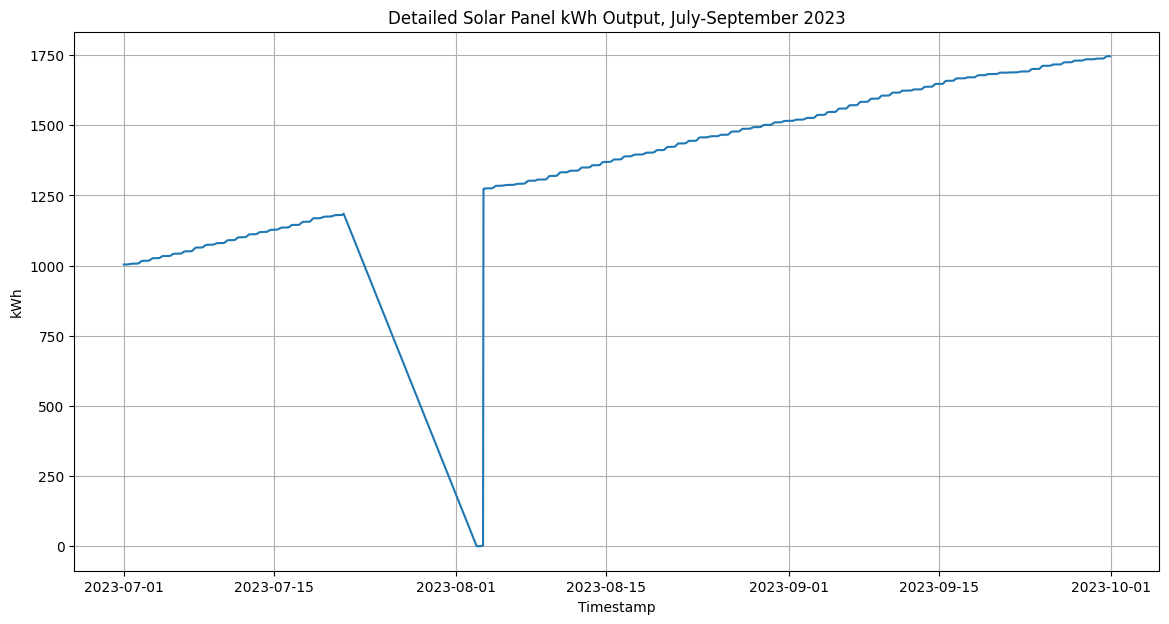

In [4]:
# Converting timestamps to UTC
solar_data['timestamp'] = pd.to_datetime(solar_data['timestamp'], utc=True)

#filtering for July to September 2023
filtered_solar_data = solar_data[(solar_data['timestamp'].dt.month >= 7) & 
                                 (solar_data['timestamp'].dt.month <= 9) &
                                 (solar_data['timestamp'].dt.year == 2023)]

# Replotting the detailed data for this period
plt.figure(figsize=(14, 7))
plt.plot(filtered_solar_data['timestamp'], filtered_solar_data['kwh'])
plt.title('Detailed Solar Panel kWh Output, July-September 2023')
plt.xlabel('Timestamp')
plt.ylabel('kWh')
plt.grid(True)
plt.show()


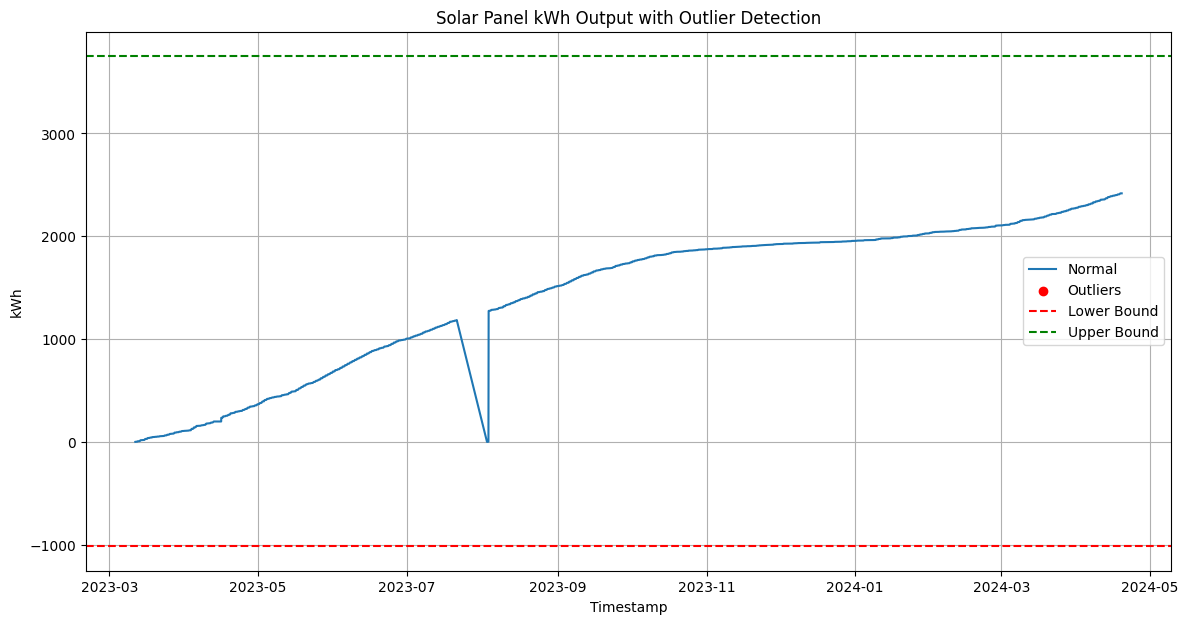

(0, -1014.5922, 3751.1805999999997)

In [5]:
# Calculate the IQR for kWh output
Q1 = solar_data['kwh'].quantile(0.25)
Q3 = solar_data['kwh'].quantile(0.75)
IQR = Q3 - Q1

# Define outliers as those values outside 1.5 times the IQR from the Q1 and Q3
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers in the dataset
outliers = solar_data[(solar_data['kwh'] < lower_bound) | (solar_data['kwh'] > upper_bound)]

# Plotting to visualize the normal range and outliers
plt.figure(figsize=(14, 7))
plt.plot(solar_data['timestamp'], solar_data['kwh'], label='Normal')
plt.scatter(outliers['timestamp'], outliers['kwh'], color='red', label='Outliers')
plt.axhline(y=lower_bound, color='r', linestyle='--', label='Lower Bound')
plt.axhline(y=upper_bound, color='g', linestyle='--', label='Upper Bound')
plt.title('Solar Panel kWh Output with Outlier Detection')
plt.xlabel('Timestamp')
plt.ylabel('kWh')
plt.legend()
plt.grid(True)
plt.show()

# Return the number of identified outliers and bounds
outliers_count = outliers.shape[0], lower_bound, upper_bound
outliers_count


In [6]:
import pandas as pd

# Load your interpolated data
data = pd.read_csv('../DATA2/solar_zonder_augustus.csv')
data['timestamp'] = pd.to_datetime(data['timestamp'], utc=True)
data.set_index('timestamp', inplace=True)

# Generate a date range for missing timestamps
missing_timestamps = pd.date_range(start='2023-07-21 12:00:11+00:00', end='2023-08-03 13:00:12+00:00', freq='h')

# Reindex the DataFrame to include the new date range
data = data.reindex(missing_timestamps, method='nearest', tolerance='1h')

# Interpolate the missing values linearly
data_interpolated = data.interpolate(method='time')

# Reset index to turn the datetime index back into a column
data_interpolated.reset_index(inplace=True)
data_interpolated.rename(columns={'index': 'timestamp'}, inplace=True)

# Save the data
data_interpolated.to_csv('../DATA2/solar_alleen_augustus.csv', index=False)

print("Data generation and interpolation complete. Data saved.")



Data generation and interpolation complete. Data saved.


In [7]:
import pandas as pd

# Load the main and interpolated data
main_data = pd.read_csv('../DATA2/solar_zonder_augustus.csv')
interpolated_data = pd.read_csv('../DATA2/solar_alleen_augustus.csv')

# Convert timestamps to datetime
main_data['timestamp'] = pd.to_datetime(main_data['timestamp'])
interpolated_data['timestamp'] = pd.to_datetime(interpolated_data['timestamp'])

# Dropping the original rows where the new data will be inserted
start_time = pd.to_datetime('2023-07-21 14:00:11+02:00', utc=True)
end_time = pd.to_datetime('2023-08-03 15:00:12+02:00', utc=True)
mask = (main_data['timestamp'] > start_time) & (main_data['timestamp'] < end_time)
filtered_main_data = main_data[~mask]


# Concatenate the old data without the dropped rows and the new interpolated data
combined_data = pd.concat([filtered_main_data, interpolated_data])

# Sort the data by timestamp
combined_data.sort_values('timestamp', inplace=True)

# Remove any potential duplicates and reset the index
final_data = combined_data.drop_duplicates(subset='timestamp').reset_index(drop=True)

# Save the final data to a new CSV file
final_data.to_csv('../DATA2/solar_final.csv', index=False)
print("Data merged and saved successfully.")
solar_data = pd.read_csv('../DATA2/solar_final.csv')




Data merged and saved successfully.


C:\Users\tomde\AppData\Local\Temp\ipykernel_8796\718957880.py:8: FutureWarning: In a future version of pandas, parsing datetimes with mixed time zones will raise an error unless `utc=True`. Please specify `utc=True` to opt in to the new behaviour and silence this warning. To create a `Series` with mixed offsets and `object` dtype, please use `apply` and `datetime.datetime.strptime`
  main_data['timestamp'] = pd.to_datetime(main_data['timestamp'])


C:\Users\tomde\AppData\Local\Temp\ipykernel_8796\3986960475.py:5: FutureWarning: In a future version of pandas, parsing datetimes with mixed time zones will raise an error unless `utc=True`. Please specify `utc=True` to opt in to the new behaviour and silence this warning. To create a `Series` with mixed offsets and `object` dtype, please use `apply` and `datetime.datetime.strptime`
  plt.plot(pd.to_datetime(solar_data['timestamp'], format='mixed'), solar_data['kwh'])


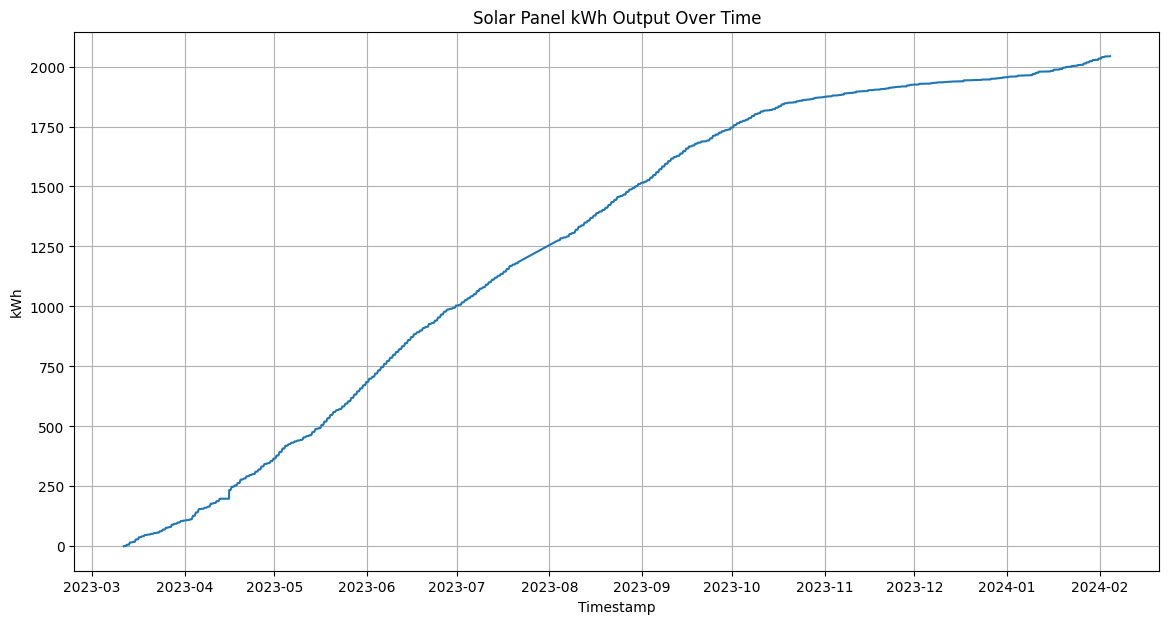

In [8]:
import matplotlib.pyplot as plt

# Plotting the kWh output to inspect for any obvious outliers or unusual patterns
plt.figure(figsize=(14, 7))
plt.plot(pd.to_datetime(solar_data['timestamp'], format='mixed'), solar_data['kwh'])
plt.title('Solar Panel kWh Output Over Time')
plt.xlabel('Timestamp')
plt.ylabel('kWh')
plt.grid(True)
plt.show()

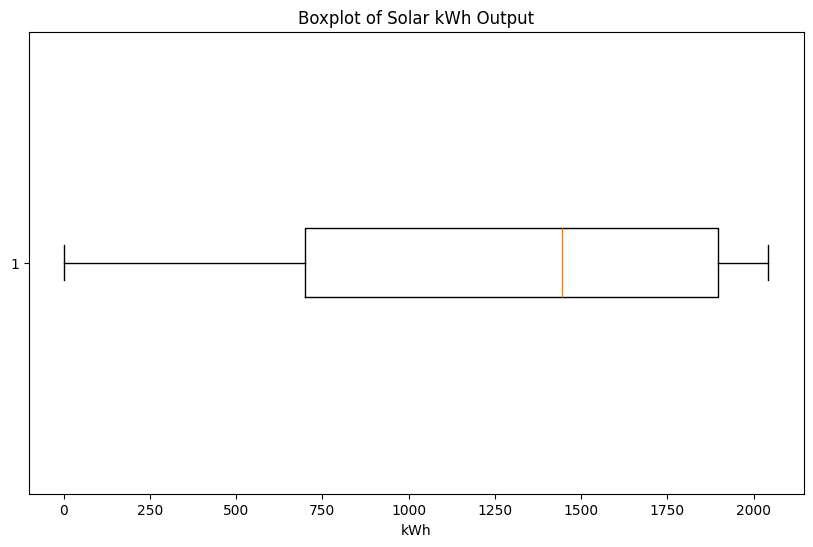

,kwh
count,7908.000000
mean,1271.281548
std,662.870430
min,0.540000
25%,698.739000
50%,1444.640250
75%,1897.269400
max,2043.015400


In [9]:
# Display summary statistics and boxplot to identify outliers in the 'kwh' column
solar_stats = solar_data.describe()

# Creating a boxplot to visualize outliers in the 'kwh' column
plt.figure(figsize=(10, 6))
plt.boxplot(solar_data['kwh'], vert=False)
plt.title('Boxplot of Solar kWh Output')
plt.xlabel('kWh')
plt.show()

solar_stats

In [10]:
"""
import matplotlib.pyplot as plt

solar_data2 = pd.read_csv('../DATA2/solar_per_uur.csv')
# Plot the daily kWh production over time
plt.figure(figsize=(14, 7))
plt.plot(solar_data2['timestamp'], solar_data2['daily_kwh'], label='Hourly Production (kWh)', color='blue')
plt.title('Hourly Solar Energy Production')
plt.xlabel('Timestamp')
plt.ylabel('Energy Produced (kWh)')
plt.grid(True)
plt.legend()
plt.show()
"""


"\nimport matplotlib.pyplot as plt\n\nsolar_data2 = pd.read_csv('../DATA2/solar_per_uur.csv')\n# Plot the daily kWh production over time\nplt.figure(figsize=(14, 7))\nplt.plot(solar_data2['timestamp'], solar_data2['daily_kwh'], label='Hourly Production (kWh)', color='blue')\nplt.title('Hourly Solar Energy Production')\nplt.xlabel('Timestamp')\nplt.ylabel('Energy Produced (kWh)')\nplt.grid(True)\nplt.legend()\nplt.show()\n"

In [11]:








# Convert the 'timestamp' column to datetime
solar_data['timestamp'] = pd.to_datetime(solar_data['timestamp'], format='mixed', utc=True)

# Sort the data by 'timestamp' just in case it's not already sorted
solar_data.sort_values('timestamp', inplace=True)

# Calculate the difference in 'kwh' to find the amount generated each hour (assuming data is hourly)
solar_data['daily_kwh'] = solar_data['kwh'].diff()

# Handle the first row which will have a NaN value after differencing
solar_data['daily_kwh'].iloc[0] = solar_data['kwh'].iloc[0]

# Display the first few rows to verify the changes
solar_data.head()

# if daily_kwh is larger then 10 or smaller then 0, then it is an outlier so give it value 0
solar_data['daily_kwh'] = solar_data['daily_kwh'].apply(lambda x: 0 if x < 0 or x > 10 else x)

# Save the modified dataset to a new CSV file
solar_data.to_csv('../DATA2/solar_per_uur.csv', index=False)


solar_hourly_data = pd.read_csv('../DATA2/solar_per_uur.csv')

# Convert the 'timestamp' column to datetime
solar_hourly_data['timestamp'] = pd.to_datetime(solar_hourly_data['timestamp'],format='mixed', utc=True)

# Set the timestamp as the index
solar_hourly_data.set_index('timestamp', inplace=True)

# Group by date and sum the kWh readings for each day
daily_kwh = solar_hourly_data['daily_kwh'].resample('D').sum()

# Reset the index to turn the date index back to a regular column
daily_kwh = daily_kwh.reset_index()

# Rename the columns appropriately
daily_kwh.columns = ['date', 'total_daily_kwh']

# Show the resulting DataFrame
daily_kwh.head()

# Save the daily kWh data to a new CSV file
daily_kwh.to_csv('../DATA2/solar_per_dag.csv', index=False)
solar_data.describe()

C:\Users\tomde\AppData\Local\Temp\ipykernel_8796\1283337961.py:11: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  solar_data['daily_kwh'].iloc[0] = solar_data['kwh'].iloc[0]
C:\Users\tomde\AppData\Local\Temp\ipykernel_8796\1283337961.py:11: S

,kwh,daily_kwh
count,7908.000000,7908.000000
mean,1271.281548,0.253771
std,662.870430,0.453165
min,0.540000,0.000000
25%,698.739000,0.000000
50%,1444.640250,0.001850
75%,1897.269400,0.281498
max,2043.015400,2.098000


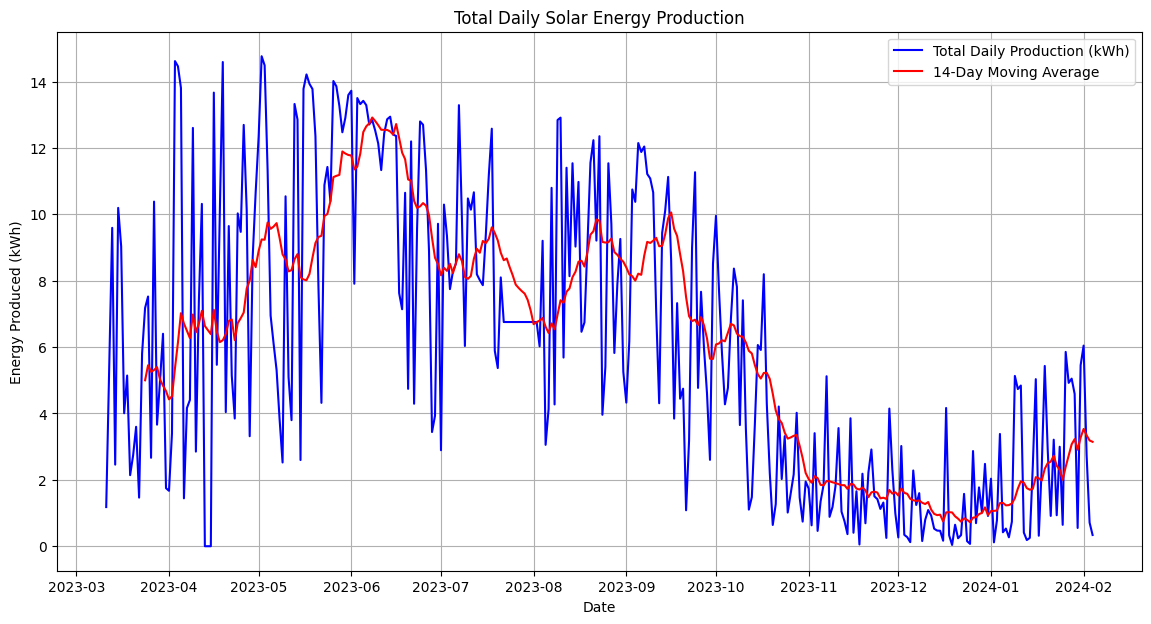

In [12]:

import matplotlib.pyplot as plt

# Load the daily kWh data
daily_kwh = pd.read_csv('../DATA2/solar_per_dag.csv')

# Convert the 'date' column to datetime
daily_kwh['date'] = pd.to_datetime(daily_kwh['date'])
daily_kwh['rolling_avg'] = daily_kwh['total_daily_kwh'].rolling(window=14).mean()

# Plot the total daily kWh production over time
plt.figure(figsize=(14, 7))
plt.plot(daily_kwh['date'], daily_kwh['total_daily_kwh'], label='Total Daily Production (kWh)', color='blue')
plt.plot(daily_kwh['date'], daily_kwh['rolling_avg'], label='14-Day Moving Average', color='red')

plt.title('Total Daily Solar Energy Production')
plt.xlabel('Date')
plt.ylabel('Energy Produced (kWh)')
plt.grid(True)
plt.legend()
plt.show()

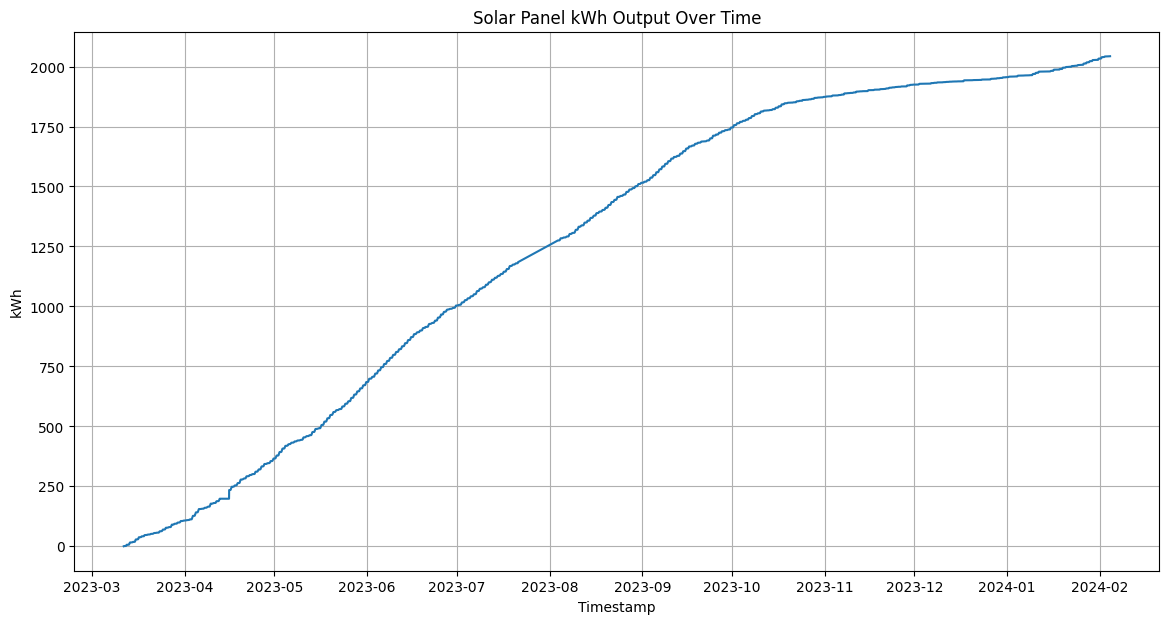

In [13]:
import matplotlib.pyplot as plt

# Plotting the kWh output to inspect for any obvious outliers or unusual patterns
plt.figure(figsize=(14, 7))
plt.plot(pd.to_datetime(solar_data['timestamp'], format='mixed'), solar_data['kwh'])
plt.title('Solar Panel kWh Output Over Time')
plt.xlabel('Timestamp')
plt.ylabel('kWh')
plt.grid(True)
plt.show()

In [14]:
# Checking the time intervals for the weather data and sunrise-sunset data
weather_data['timestamp'] = pd.to_datetime(weather_data['timestamp'], utc=True)
weather_data_resample_check = weather_data['timestamp'].diff().describe()

sunrise_sunset_data['datum'] = pd.to_datetime(sunrise_sunset_data['datum'], utc=True)
sunrise_sunset_resample_check = sunrise_sunset_data['datum'].diff().describe()

weather_data_resample_check, sunrise_sunset_resample_check

(count                        39839
 mean     0 days 00:14:59.932227214
 std      0 days 00:25:58.826160406
 min                0 days 00:00:00
 25%                0 days 00:00:00
 50%                0 days 00:00:00
 75%                0 days 00:00:00
 max                0 days 01:00:00
 Name: timestamp, dtype: object,
 count                730
 mean     1 days 00:00:00
 std      0 days 00:00:00
 min      1 days 00:00:00
 25%      1 days 00:00:00
 50%      1 days 00:00:00
 75%      1 days 00:00:00
 max      1 days 00:00:00
 Name: datum, dtype: object)

In [15]:

# Assuming 'weather_data' is already loaded
# Convert all columns that should be numeric but are objects
numeric_cols = weather_data.columns[weather_data.dtypes == 'object']
for col in numeric_cols:
    weather_data[col] = pd.to_numeric(weather_data[col], errors='coerce')

# Now resample the data, automatically excluding any remaining non-numeric columns
weather_data_hourly = weather_data.set_index('timestamp').resample('h').mean()

# Reset the index
weather_data_hourly.reset_index(inplace=True)

# Preview the resampled data
print(weather_data_hourly.head())



                  timestamp  FID  the_geom     code  precip_quantity  \
0 2023-03-01 09:00:00+00:00  NaN       NaN  6418.25              NaN   
1 2023-03-01 10:00:00+00:00  NaN       NaN  6418.25              NaN   
2 2023-03-01 11:00:00+00:00  NaN       NaN  6418.25              NaN   
3 2023-03-01 12:00:00+00:00  NaN       NaN  6418.25              0.0   
4 2023-03-01 13:00:00+00:00  NaN       NaN  6418.25              NaN   

   precip_range   temp  temp_min  temp_max  temp_grass_min  ...  \
0           NaN  2.975       NaN       NaN           -10.0  ...   
1           NaN  4.000       NaN       NaN             NaN  ...   
2           NaN  4.800       NaN       NaN             NaN  ...   
3           1.0  5.375       NaN       NaN             NaN  ...   
4           NaN  5.900       NaN       NaN             NaN  ...   

   wind_speed_unit  wind_direction  wind_peak_speed  humidity_relative  \
0              1.0          56.575            7.450          66.300000   
1              1

In [16]:
# Convert times to string and then combine with date strings for proper datetime conversion
sunrise_sunset_data['Opkomst'] = pd.to_datetime(sunrise_sunset_data['datum'].astype(str) + ' ' + sunrise_sunset_data['Opkomst'].astype(str))
sunrise_sunset_data['Ondergang'] = pd.to_datetime(sunrise_sunset_data['datum'].astype(str) + ' ' + sunrise_sunset_data['Ondergang'].astype(str))

# If the original data times are in local time, convert to UTC for consistency (adjust timezone if known)
sunrise_sunset_data['Opkomst'] = sunrise_sunset_data['Opkomst'].dt.tz_convert('UTC')
sunrise_sunset_data['Ondergang'] = sunrise_sunset_data['Ondergang'].dt.tz_convert('UTC')

# Display the updated data to ensure the conversions are correct
sunrise_sunset_data_head_updated = sunrise_sunset_data.head()

sunrise_sunset_data_head_updated




C:\Users\tomde\AppData\Local\Temp\ipykernel_8796\610579339.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  sunrise_sunset_data['Opkomst'] = pd.to_datetime(sunrise_sunset_data['datum'].astype(str) + ' ' + sunrise_sunset_data['Opkomst'].astype(str))
C:\Users\tomde\AppData\Local\Temp\ipykernel_8796\610579339.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  sunrise_sunset_data['Ondergang'] = pd.to_datetime(sunrise_sunset_data['datum'].astype(str) + ' ' + sunrise_sunset_data['Ondergang'].astype(str))


,datum,Opkomst,Op ware middag,Ondergang
0,2023-01-01 00:00:00+00:00,2023-01-01 08:45:00+00:00,12:46:00,2023-01-01 16:47:00+00:00
1,2023-01-02 00:00:00+00:00,2023-01-02 08:45:00+00:00,12:46:00,2023-01-02 16:48:00+00:00
2,2023-01-03 00:00:00+00:00,2023-01-03 08:45:00+00:00,12:47:00,2023-01-03 16:49:00+00:00
3,2023-01-04 00:00:00+00:00,2023-01-04 08:44:00+00:00,12:47:00,2023-01-04 16:51:00+00:00
4,2023-01-05 00:00:00+00:00,2023-01-05 08:44:00+00:00,12:48:00,2023-01-05 16:52:00+00:00


FIXING WEATHER.CSV


In [17]:
import pandas as pd

# Load the weather data
weather_data_path = '../DATA2/weather.csv'
weather_data = pd.read_csv(weather_data_path)

weather_data.describe()


,code,precip_quantity,precip_range,temp,temp_min,temp_max,temp_grass_min,wind_speed,wind_speed_unit,wind_direction,wind_peak_speed,humidity_relative,weather_current,pressure,pressure_station_level,sun_duration_24hours,short_wave_from_sky_24hours,cloudiness
count,39840.000000,6291.000000,6417.000000,39840.000000,1660.000000,1657.000000,1189.000000,39827.000000,39840.0,39414.000000,39815.000000,29880.000000,2802.000000,39828.000000,39840.000000,1245.000000,8.300000e+02,15455.000000
mean,6418.250000,0.965268,1.500078,11.857083,9.035602,15.101509,6.575442,4.887285,1.0,189.530342,8.477408,81.043618,43.602784,1013.377732,1011.530043,322.359036,1.070303e+07,5.490780
std,9.909085,2.478198,0.500039,5.858675,4.943259,6.517190,5.355668,2.688590,0.0,89.520098,4.183079,13.898511,34.207104,11.320142,11.333157,276.246995,7.921183e+06,2.583189
min,6407.000000,0.000000,1.000000,-5.900000,-6.000000,-1.000000,-10.200000,0.000000,1.0,0.100000,0.300000,24.700000,1.000000,965.100000,963.500000,0.000000,4.169000e+05,0.000000
25%,6412.250000,0.000000,1.000000,8.200000,6.000000,10.600000,3.200000,2.959000,1.0,135.900000,5.300000,72.500000,20.000000,1007.200000,1005.300000,54.000000,3.858250e+06,4.000000
50%,6416.000000,0.000000,2.000000,11.200000,9.100000,13.900000,7.000000,4.445000,1.0,206.500000,8.000000,84.200000,46.000000,1014.700000,1012.900000,268.000000,8.987750e+06,7.000000
75%,6422.000000,0.600000,2.000000,15.900000,12.525000,20.200000,10.300000,6.533000,1.0,250.000000,11.000000,92.000000,61.000000,1021.200000,1019.400000,537.000000,1.651740e+07,7.000000
max,6434.000000,43.400000,2.000000,32.400000,23.000000,32.900000,20.500000,21.088000,1.0,360.000000,31.100000,100.000000,162.000000,1041.800000,1040.400000,950.000000,2.943290e+07,8.000000


In [18]:
weather_data.head()

,FID,the_geom,code,timestamp,precip_quantity,precip_range,temp,temp_min,temp_max,temp_grass_min,...,wind_speed_unit,wind_direction,wind_peak_speed,humidity_relative,weather_current,pressure,pressure_station_level,sun_duration_24hours,short_wave_from_sky_24hours,cloudiness
0,synop_data.6418.2023-03-01 09:00:00+00,POINT (51.347375 3.201846),6418,2023-03-01T09:00:00,NaN,NaN,4.9,NaN,NaN,NaN,...,1,50.0,9.4,54.3,NaN,1029.7,1028.0,NaN,NaN,0.0
1,synop_data.6414.2023-03-01 09:00:00+00,POINT (50.90398 3.121692),6414,2023-03-01T09:00:00,NaN,NaN,2.1,NaN,NaN,NaN,...,1,44.7,7.5,73.7,NaN,1029.3,1025.9,NaN,NaN,NaN
2,synop_data.6407.2023-03-01 09:00:00+00,POINT (51.200341 2.887306),6407,2023-03-01T09:00:00,NaN,NaN,3.3,NaN,NaN,NaN,...,1,60.0,7.0,NaN,NaN,1029.6,1029.0,NaN,NaN,1.0
3,synop_data.6434.2023-03-01 09:00:00+00,POINT (50.980293 3.816003),6434,2023-03-01T09:00:00,NaN,NaN,1.6,NaN,NaN,-10.0,...,1,71.6,5.9,70.9,NaN,1029.4,1027.3,NaN,NaN,NaN
4,synop_data.6434.2023-03-01 10:00:00+00,POINT (50.980293 3.816003),6434,2023-03-01T10:00:00,NaN,NaN,3.0,NaN,NaN,NaN,...,1,56.0,7.6,60.8,NaN,1028.8,1026.7,NaN,NaN,NaN


In [19]:
# Convert 'timestamp' to datetime
weather_data['timestamp'] = pd.to_datetime(weather_data['timestamp'], utc=True)

# Impute missing values for 'cloudiness' and 'humidity_relative' using the median of the available data
humidity_relative_median = weather_data['humidity_relative'].median()


weather_data['humidity_relative'].fillna(humidity_relative_median, inplace=True)

# Re-checking for missing values to confirm changes
updated_missing_values = weather_data[['humidity_relative']].isnull().sum()

# Display the changes
updated_missing_values, weather_data.head()


C:\Users\tomde\AppData\Local\Temp\ipykernel_8796\2871127865.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  weather_data['humidity_relative'].fillna(humidity_relative_median, inplace=True)


(humidity_relative    0
 dtype: int64,
                                       FID                    the_geom  code  \
 0  synop_data.6418.2023-03-01 09:00:00+00  POINT (51.347375 3.201846)  6418   
 1  synop_data.6414.2023-03-01 09:00:00+00   POINT (50.90398 3.121692)  6414   
 2  synop_data.6407.2023-03-01 09:00:00+00  POINT (51.200341 2.887306)  6407   
 3  synop_data.6434.2023-03-01 09:00:00+00  POINT (50.980293 3.816003)  6434   
 4  synop_data.6434.2023-03-01 10:00:00+00  POINT (50.980293 3.816003)  6434   
 
                   timestamp  precip_quantity  precip_range  temp  temp_min  \
 0 2023-03-01 09:00:00+00:00              NaN           NaN   4.9       NaN   
 1 2023-03-01 09:00:00+00:00              NaN           NaN   2.1       NaN   
 2 2023-03-01 09:00:00+00:00              NaN           NaN   3.3       NaN   
 3 2023-03-01 09:00:00+00:00              NaN           NaN   1.6       NaN   
 4 2023-03-01 10:00:00+00:00              NaN           NaN   3.0       NaN   
 
   

In [20]:
weather_data.describe()

,code,precip_quantity,precip_range,temp,temp_min,temp_max,temp_grass_min,wind_speed,wind_speed_unit,wind_direction,wind_peak_speed,humidity_relative,weather_current,pressure,pressure_station_level,sun_duration_24hours,short_wave_from_sky_24hours,cloudiness
count,39840.000000,6291.000000,6417.000000,39840.000000,1660.000000,1657.000000,1189.000000,39827.000000,39840.0,39414.000000,39815.000000,39840.000000,2802.000000,39828.000000,39840.000000,1245.000000,8.300000e+02,15455.000000
mean,6418.250000,0.965268,1.500078,11.857083,9.035602,15.101509,6.575442,4.887285,1.0,189.530342,8.477408,81.832713,43.602784,1013.377732,1011.530043,322.359036,1.070303e+07,5.490780
std,9.909085,2.478198,0.500039,5.858675,4.943259,6.517190,5.355668,2.688590,0.0,89.520098,4.183079,12.113765,34.207104,11.320142,11.333157,276.246995,7.921183e+06,2.583189
min,6407.000000,0.000000,1.000000,-5.900000,-6.000000,-1.000000,-10.200000,0.000000,1.0,0.100000,0.300000,24.700000,1.000000,965.100000,963.500000,0.000000,4.169000e+05,0.000000
25%,6412.250000,0.000000,1.000000,8.200000,6.000000,10.600000,3.200000,2.959000,1.0,135.900000,5.300000,77.100000,20.000000,1007.200000,1005.300000,54.000000,3.858250e+06,4.000000
50%,6416.000000,0.000000,2.000000,11.200000,9.100000,13.900000,7.000000,4.445000,1.0,206.500000,8.000000,84.200000,46.000000,1014.700000,1012.900000,268.000000,8.987750e+06,7.000000
75%,6422.000000,0.600000,2.000000,15.900000,12.525000,20.200000,10.300000,6.533000,1.0,250.000000,11.000000,89.600000,61.000000,1021.200000,1019.400000,537.000000,1.651740e+07,7.000000
max,6434.000000,43.400000,2.000000,32.400000,23.000000,32.900000,20.500000,21.088000,1.0,360.000000,31.100000,100.000000,162.000000,1041.800000,1040.400000,950.000000,2.943290e+07,8.000000


In [21]:
from sklearn.impute import KNNImputer

# Since KNN works with numerical data, ensure all necessary columns are numerical and select relevant features
weather_data_numeric = weather_data[['temp', 'humidity_relative', 'pressure', 'cloudiness']].copy()

# Create the imputer object with k=5 (considering 5 nearest neighbors)
knn_imputer = KNNImputer(n_neighbors=5)

# Fit the imputer and transform the data; this will fill in the missing 'cloudiness' values
weather_data_imputed = knn_imputer.fit_transform(weather_data_numeric)

# Update the original data with imputed values
weather_data['cloudiness'] = weather_data_imputed[:, -1]  # Last column is 'cloudiness'

# Check if there are still any missing values
updated_missing_values_cloudiness = pd.isnull(weather_data['cloudiness']).sum()

# Show the first few rows of the updated dataset to confirm changes
weather_data['cloudiness'].head(), updated_missing_values_cloudiness


(0    0.0
 1    3.0
 2    1.0
 3    3.0
 4    3.0
 Name: cloudiness, dtype: float64,
 0)

In [22]:
weather_data.describe()

,code,precip_quantity,precip_range,temp,temp_min,temp_max,temp_grass_min,wind_speed,wind_speed_unit,wind_direction,wind_peak_speed,humidity_relative,weather_current,pressure,pressure_station_level,sun_duration_24hours,short_wave_from_sky_24hours,cloudiness
count,39840.000000,6291.000000,6417.000000,39840.000000,1660.000000,1657.000000,1189.000000,39827.000000,39840.0,39414.000000,39815.000000,39840.000000,2802.000000,39828.000000,39840.000000,1245.000000,8.300000e+02,39840.000000
mean,6418.250000,0.965268,1.500078,11.857083,9.035602,15.101509,6.575442,4.887285,1.0,189.530342,8.477408,81.832713,43.602784,1013.377732,1011.530043,322.359036,1.070303e+07,5.650120
std,9.909085,2.478198,0.500039,5.858675,4.943259,6.517190,5.355668,2.688590,0.0,89.520098,4.183079,12.113765,34.207104,11.320142,11.333157,276.246995,7.921183e+06,2.344282
min,6407.000000,0.000000,1.000000,-5.900000,-6.000000,-1.000000,-10.200000,0.000000,1.0,0.100000,0.300000,24.700000,1.000000,965.100000,963.500000,0.000000,4.169000e+05,0.000000
25%,6412.250000,0.000000,1.000000,8.200000,6.000000,10.600000,3.200000,2.959000,1.0,135.900000,5.300000,77.100000,20.000000,1007.200000,1005.300000,54.000000,3.858250e+06,4.000000
50%,6416.000000,0.000000,2.000000,11.200000,9.100000,13.900000,7.000000,4.445000,1.0,206.500000,8.000000,84.200000,46.000000,1014.700000,1012.900000,268.000000,8.987750e+06,6.600000
75%,6422.000000,0.600000,2.000000,15.900000,12.525000,20.200000,10.300000,6.533000,1.0,250.000000,11.000000,89.600000,61.000000,1021.200000,1019.400000,537.000000,1.651740e+07,7.600000
max,6434.000000,43.400000,2.000000,32.400000,23.000000,32.900000,20.500000,21.088000,1.0,360.000000,31.100000,100.000000,162.000000,1041.800000,1040.400000,950.000000,2.943290e+07,8.000000


In [23]:
# drop precip_quantity column and precip_range column and temp_grass_min column and weather_current column and short_wave_from_sky_24hours column and temp_min column and temp_max column and temp_max column and sun_duration column and wind_speed_max column and wind_speed_avg column and wind_direction_avg column and wind_direction_max column and wind_gust_max column and wind_gust_avg column and weather_current column and short_wave_from_sky_24hours column and temp_min column and temp_max and sun_duration_24hours
weather_data.drop(['precip_quantity', 'precip_range', 'temp_grass_min', 'weather_current', 'short_wave_from_sky_24hours', 'temp_min', 'temp_max', 'weather_current', 'short_wave_from_sky_24hours', 'temp_min', 'temp_max', 'sun_duration_24hours'], axis=1, inplace=True)
weather_data.describe()

,code,temp,wind_speed,wind_speed_unit,wind_direction,wind_peak_speed,humidity_relative,pressure,pressure_station_level,cloudiness
count,39840.000000,39840.000000,39827.000000,39840.0,39414.000000,39815.000000,39840.000000,39828.000000,39840.000000,39840.000000
mean,6418.250000,11.857083,4.887285,1.0,189.530342,8.477408,81.832713,1013.377732,1011.530043,5.650120
std,9.909085,5.858675,2.688590,0.0,89.520098,4.183079,12.113765,11.320142,11.333157,2.344282
min,6407.000000,-5.900000,0.000000,1.0,0.100000,0.300000,24.700000,965.100000,963.500000,0.000000
25%,6412.250000,8.200000,2.959000,1.0,135.900000,5.300000,77.100000,1007.200000,1005.300000,4.000000
50%,6416.000000,11.200000,4.445000,1.0,206.500000,8.000000,84.200000,1014.700000,1012.900000,6.600000
75%,6422.000000,15.900000,6.533000,1.0,250.000000,11.000000,89.600000,1021.200000,1019.400000,7.600000
max,6434.000000,32.400000,21.088000,1.0,360.000000,31.100000,100.000000,1041.800000,1040.400000,8.000000


In [24]:
# Convert 'timestamp' to datetime
weather_data['timestamp'] = pd.to_datetime(weather_data['timestamp'], utc=True)

# Impute missing values for 'wind_speed' and 'humidity_relative', and 'wind_direction' and 'wind_peak_speed'and 'pressure' using the median of the available data
humidity_relative_median = weather_data['humidity_relative'].median()
wind_speed_median = weather_data['wind_speed'].median()
wind_direction_median = weather_data['wind_direction'].median()
wind_peak_speed_median = weather_data['wind_peak_speed'].median()
pressure_median = weather_data['pressure'].median()




weather_data['humidity_relative'].fillna(humidity_relative_median, inplace=True)
weather_data['wind_speed'].fillna(wind_speed_median, inplace=True)
weather_data['wind_direction'].fillna(wind_direction_median, inplace=True)
weather_data['wind_peak_speed'].fillna(wind_peak_speed_median, inplace=True)
weather_data['pressure'].fillna(pressure_median, inplace=True)


weather_data.describe()

# Save the cleaned weather data to a new CSV file
weather_data.to_csv('../DATA2/weather_cleaned.csv', index=False)

C:\Users\tomde\AppData\Local\Temp\ipykernel_8796\1051496809.py:14: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  weather_data['humidity_relative'].fillna(humidity_relative_median, inplace=True)
C:\Users\tomde\AppData\Local\Temp\ipykernel_8796\1051496809.py:15: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values al

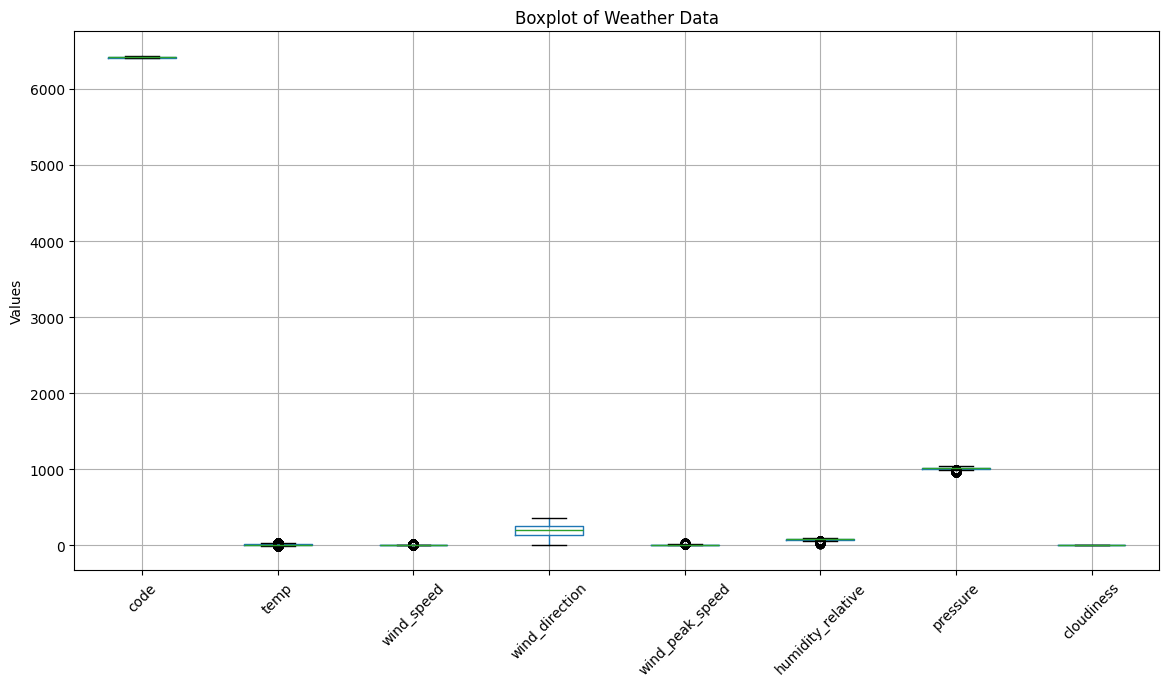

In [25]:
#create a boxplot for these columns:"code	temp	wind_speed	wind_speed_unit	wind_direction	wind_peak_speed	humidity_relative	pressure	pressure_station_level	cloudiness"
import matplotlib.pyplot as plt

# Load the cleaned weather data
weather_data = pd.read_csv('../DATA2/weather_cleaned.csv')

# Select the columns to plot
columns = ['code', 'temp', 'wind_speed', 'wind_direction', 'wind_peak_speed', 'humidity_relative', 'pressure', 'cloudiness']

# Create a boxplot for each selected column
plt.figure(figsize=(14, 7))
weather_data[columns].boxplot()
plt.title('Boxplot of Weather Data')
plt.ylabel('Values')
plt.xticks(rotation=45)
plt.show()





In [26]:
weather_data.head()
# only keep the rows FID, temp, pressure, cloudiness, humidity_relative
weather_data = weather_data[['FID', 'temp', 'pressure', 'cloudiness', 'humidity_relative']]
# save to csv as weatherIWillUse.csv
weather_data.to_csv('../DATA2/weatherIWillUse.csv', index=False)


In [27]:
# FID is currenytly like this:"synop_data.6407.2023-02-28 23:00:00+00" but it should be like this:"2024-04-19T11:00:00"
# so we will change it to the correct format
weather_data = pd.read_csv('../DATA2/weatherIWillUse.csv')
weather_data['FID'] = pd.to_datetime(weather_data['FID'].str.split('.').str[2], utc=True)
weather_data.to_csv('../DATA2/weatherIWillUse.csv', index=False)
